# Credit Card Fraud Detection

### Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [19]:
!pip install -U imbalanced-learn

### Load Data and Exploration

In [20]:
df = pd.read_csv("creditcard.csv")

In [21]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [23]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [24]:
print(df["Class"].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


### Data Visualization

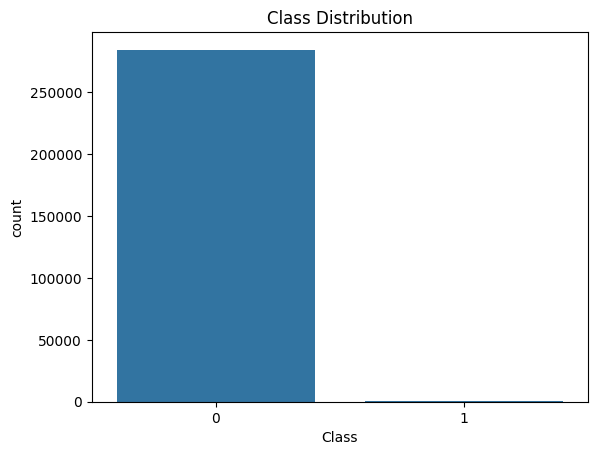

In [25]:
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")
plt.show()

Interpretation:
- The class label 0 (non-fraudulent transactions) significantly outweighs class 1 (fraudulent transactions).
- Class imbalance is extremely high, with fraudulent transactions being very rare.
- This imbalance will impact model performance—models may achieve high accuracy simply by predicting the majority class (0), but they might fail to detect frauds (class 1).

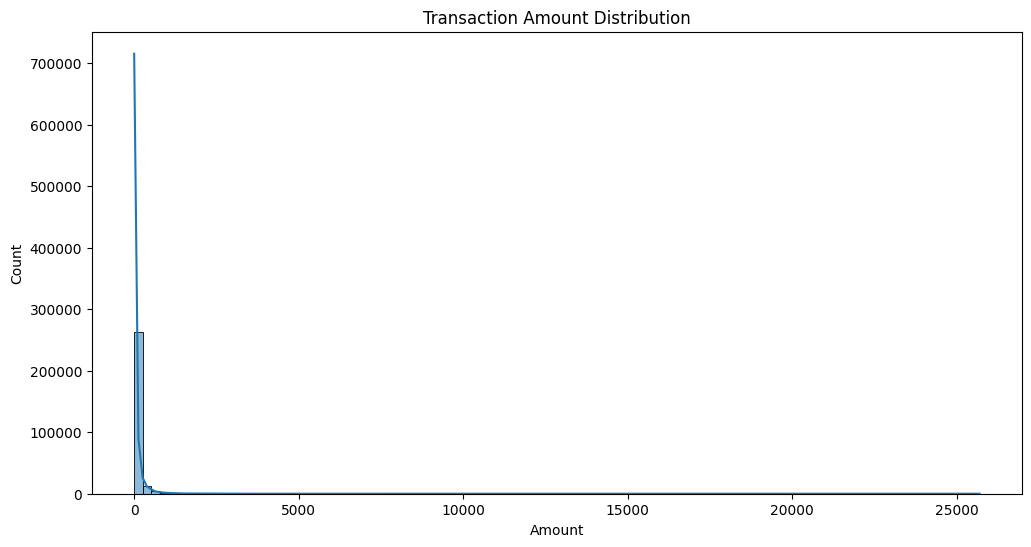

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df["Amount"], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

Interpretation:
- Most transactions are of low amounts, with a very long right tail (some very high-value transactions).
- The distribution is heavily right-skewed, indicating many small transactions and a few large ones.
- This might mean fraud could be hidden among normal low-value transactions or potentially involve high-value outliers.

### Preprocessing

In [27]:
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [28]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Handle Imbalance using SMOTE

In [29]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Report")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

results = []


### Run Baseline Models

In [31]:
models = [
    ("Logistic Regression", LogisticRegression(class_weight='balanced')),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(class_weight='balanced')),
    ("Random Forest", RandomForestClassifier(class_weight='balanced'))
]


Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



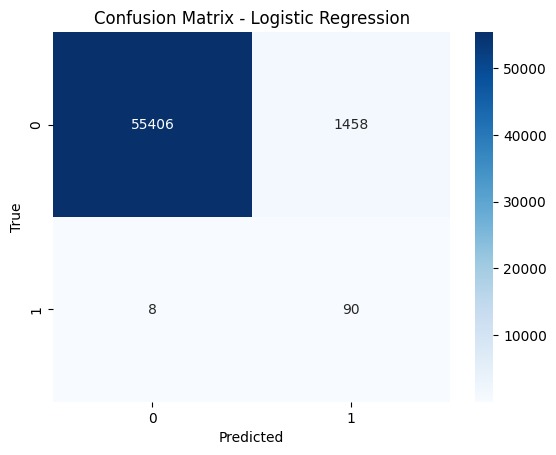


KNN Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.88      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.00      1.00     56962



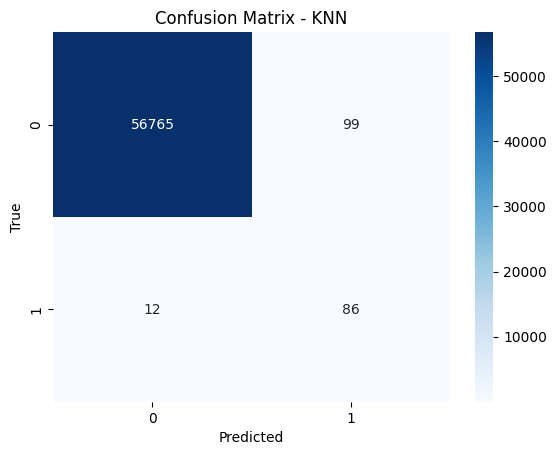


Decision Tree Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.78      0.48        98

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.74     56962
weighted avg       1.00      1.00      1.00     56962



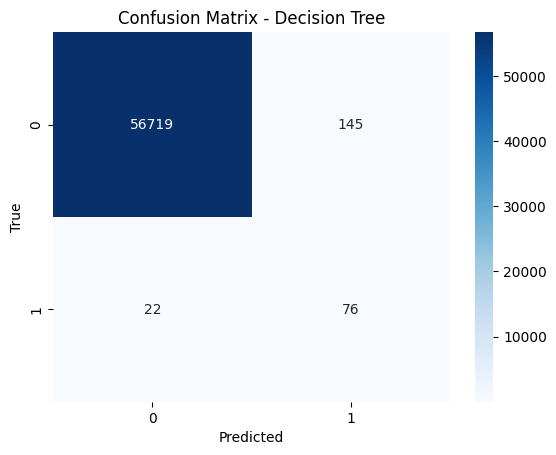


Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



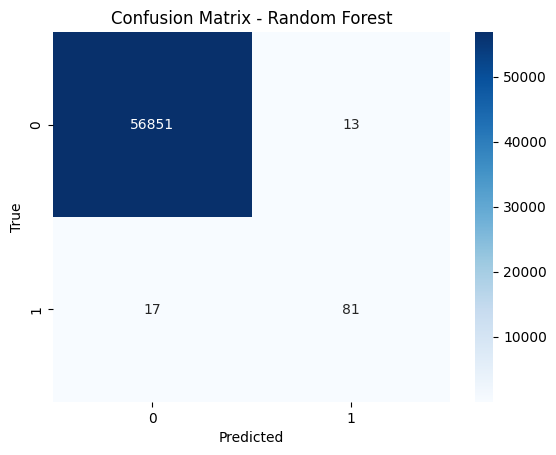

In [32]:
for name, model in models:
    result = evaluate_model(name, model, X_train_resampled, y_train_resampled, X_test, y_test)
    results.append(result)

1. Logistic Regression:
- Itdetects frauds reasonably well (TP = 90), but has high false positives (1458), which could lead to customer annoyance.
- Precision may be low due to high FP, but recall is good (only 8 actual frauds missed).
- A good starting model, but may need better tuning or feature engineering to reduce false alarms.

2. KNN:
- KNN performs better than logistic regression in terms of FP (only 99).
- It has slightly more false negatives (12 vs. 8), meaning it misses slightly more frauds.
- Very balanced model in terms of precision and recall.
- Computationally expensive for large datasets but effective after preprocessing.

3. Decision Tree:
- Slightly worse than KNN: More false positives and false negatives.
- Decision Trees tend to overfit, especially on imbalanced data.
- Can be improved by pruning or switching to ensemble methods like Random Forest.

4. Random Forest:
- Best performing model so far:
- Very low false positives (13)
- Decent number of true positives (81)
- Great balance between precision and recall.
- Robust to overfitting due to ensemble structure.
- Recommended model for deployment or further tuning.



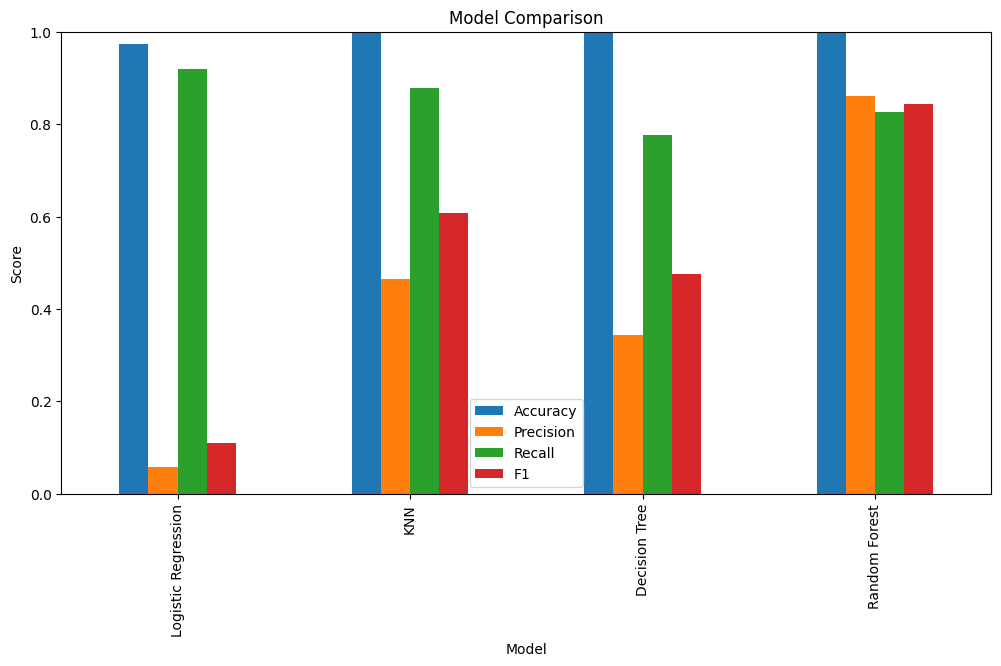

In [33]:
results_df = pd.DataFrame(results)
results_df.set_index("Model")[['Accuracy', 'Precision', 'Recall', 'F1']].plot(kind="bar", figsize=(12,6), ylim=(0, 1), title="Model Comparison")
plt.ylabel("Score")
plt.show()

### Hyperparameter Tuning - Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=1,  # Only 10 combos (fast!)
    scoring='f1',
    cv=2,
    random_state=42,
    n_jobs=-1
)

In [38]:
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c159e7c7810>},
                   random_state=42, scoring='f1')

In [39]:
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 64}


>Note" Due to resource and time constraints, the number of iterations (n_iter=1) was kept low. As a result, only a single random combination of parameters was evaluated from the search space.

### Final Model Evaluation


Tuned Random Forest Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.82      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



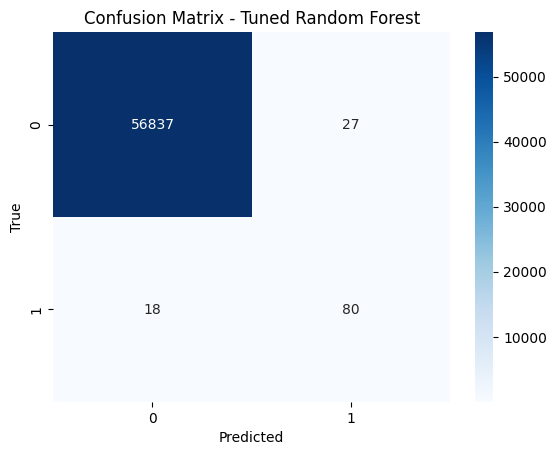

{'Model': 'Tuned Random Forest',
 'Accuracy': 0.9992099996488887,
 'Precision': 0.7476635514018691,
 'Recall': 0.8163265306122449,
 'F1': 0.7804878048780488}

In [40]:
evaluate_model("Tuned Random Forest", best_model, X_train_resampled, y_train_resampled, X_test, y_test)

- The tuned Random Forest model performs exceptionally well on non-fraud transactions (class 0).
- It also performs strongly on fraud detection (class 1), with:
- 82% recall → catching most fraudulent cases.
- 75% precision → moderate false positive rate.

### ROC Curve

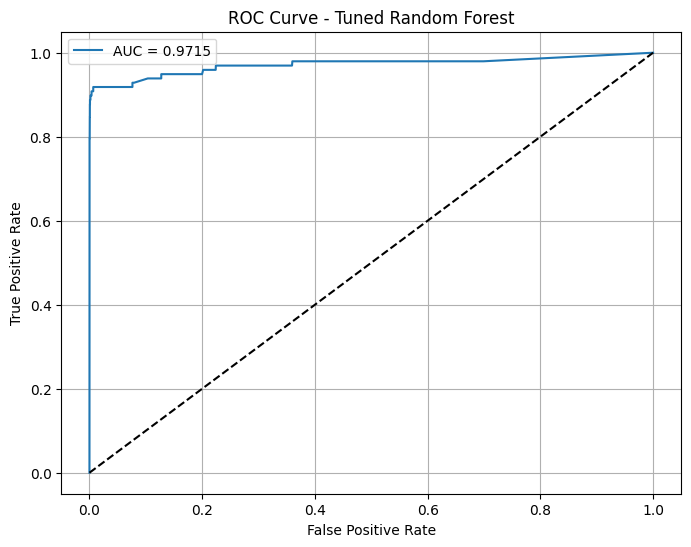

In [41]:
y_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Tuned Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

- AUC (Area Under Curve) is a metric that quantifies the overall ability of the model to distinguish between the positive and negative classes.
- A value of 0.9715 is excellent — it means the model has very high discriminatory power.


### Feature Importance

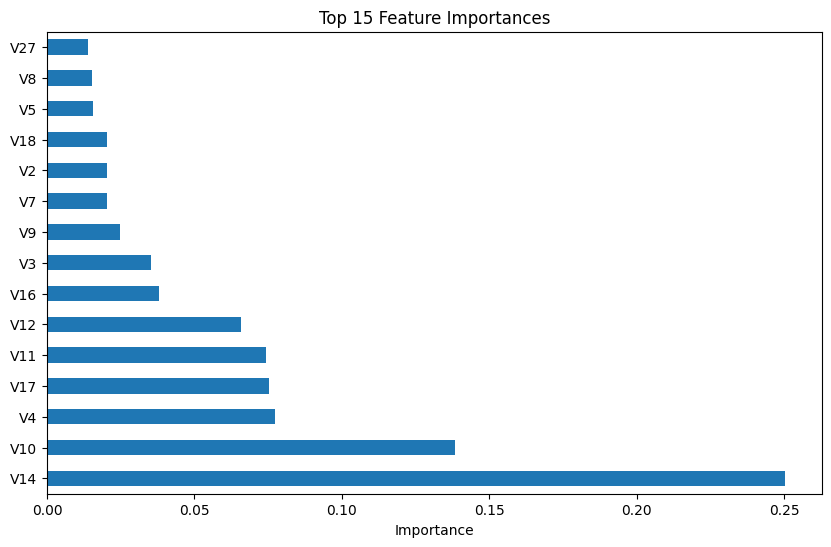

In [42]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh', figsize=(10,6))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.show()

In [43]:
from pandas import DataFrame
df_results = DataFrame(results)
print(df_results)

                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.974264   0.058140  0.918367  0.109356
1                  KNN  0.998051   0.464865  0.877551  0.607774
2        Decision Tree  0.997068   0.343891  0.775510  0.476489
3        Random Forest  0.999473   0.861702  0.826531  0.843750
